# Introduction

The purpose of this Jupyter notebook is to perform tests of the Lookback option for adaptiveness.

## Importing

Before runing the code blocks, import the following in the code block below.

In [1]:
import numpy as np
import qmcpy as qp
dims=16
abs_tol=1e-3

# European Option

The following is the European option. Lookback is to be similar to this for adaptiveness.

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 145.54773453409885


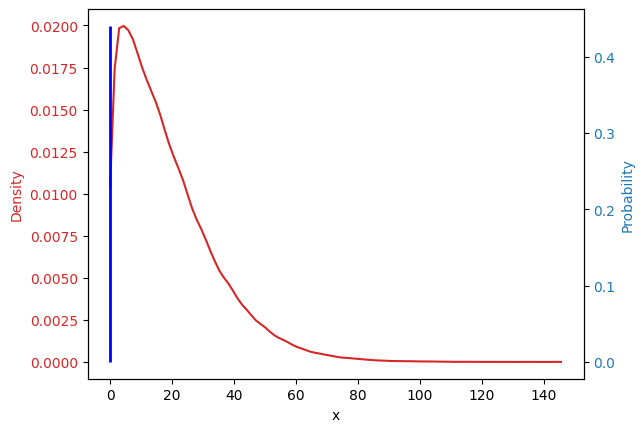

European Option value: 10.45042 (to within 1e-03) with 262144 paths


In [2]:
aco = qp.EuropeanOption(qp.Sobol(dims), volatility=0.2, start_price=100, strike_price=100, interest_rate=.05, call_put='call')
kde,a,b, approx_solution, data = qp.CubQMCSobolG(aco, abs_tol).density_estimation()
print("European Option value: %.5f (to within %1.e) with %.f paths"% (approx_solution, abs_tol, data.n_total))

# Lookback Option

The following is to test Lookback for adaptiveness.

## Call Lookback Option

The following is to test `LookBackOption` for when it is a "call."

**Call** means that the we are buying something. Specificially, we have the right to buy, but not the obligation, to buy something at a later date for a *pre*-specified price, known as the **strike price**.

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 202.061058282946


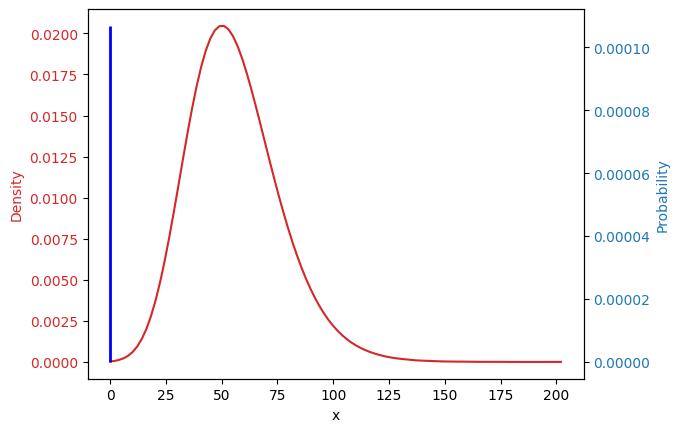

Lookback Option value: 55.77261 (to within 1e-03) with 65536 paths


In [7]:
aco = qp.LookBackOption(volatility=0.2, start_price=100, interest_rate=.05, call_put='call')
kde, a, b, approx_solution, data = qp.CubQMCSobolG(aco, abs_tol).density_estimation()
print("Lookback Option value: %.5f (to within %1.e) with %.f paths"% (approx_solution, abs_tol, data.n_total))

In [8]:
aco.get_discounted_payoffs()

3.10697033405178

## Put Lookback Option

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 196.40445504566753


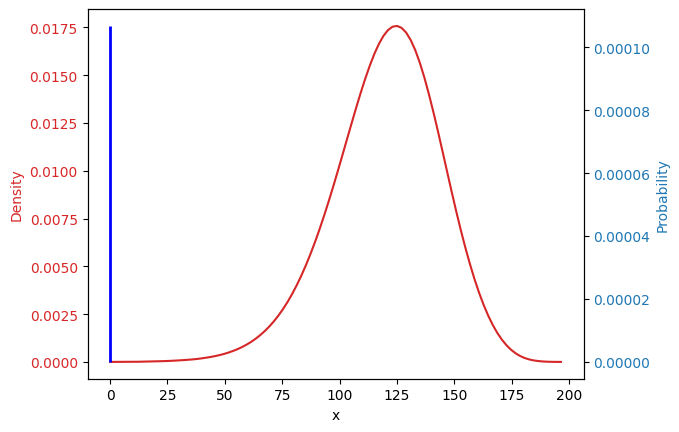

European Option value: 120.16089 (to within 1e-03) with 65536 paths


In [9]:
aco = qp.LookBackOption(volatility=0.2, start_price=100, interest_rate=.05, call_put='put')
kde, a, b, approx_solution, data = qp.CubQMCSobolG(aco, abs_tol).density_estimation()
print("European Option value: %.5f (to within %1.e) with %.f paths"% (approx_solution, abs_tol, data.n_total))

In [10]:
aco.get_discounted_payoffs()

0.0

# Lookback Option Multilevel Dimension

The following is to test for multilevel dimensions for the Lookback option.